In [68]:
# Import các thư viện thông dụng
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Import các distribution packages từ thư viện scipy
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm
from scipy.stats import t

## Đề 1

### Tạo dữ liệu

In [69]:
# Tạo dữ liệu mẫu
np.random.seed(42)

# Phân phối Nhị Thức: Số lần trúng số trong 10 lần chơi (xác suất trúng là 0.2)
binomial_data = binom.rvs(n=10, p=0.2, size=1000)

# Phân phối Poisson: Số khách hàng đến quán cafe trong một giờ (trung bình 5 khách/giờ)
poisson_data = poisson.rvs(mu=5, size=1000)

# Phân phối Chuẩn: Điểm thi của 1000 học sinh (trung bình 70, độ lệch chuẩn 10)
normal_data = norm.rvs(loc=70, scale=10, size=1000)

# Tạo DataFrame chứa dữ liệu
df = pd.DataFrame({
    'Binomial': binomial_data,
    'Poisson': poisson_data,
    'Normal': normal_data
})

df.head()


,Binomial,Poisson,Normal
0,1,8,77.031425
1,4,4,75.332073
2,3,5,71.654037
3,2,10,56.179824
4,1,3,65.163829


### Bài 1: Phân phối Nhị Thức
Một trò chơi quay số có 10 lần quay, xác suất trúng mỗi lần là 0.2. Nếu một người chơi thử 1000 lần, hãy:

- Tính số lần trung bình mà người chơi trúng trong 10 lần quay.
- Xác suất để một người trúng ít nhất 3 lần trong một vòng quay 10 lần.

In [70]:
n, p = 10, 0.2
mean_binom = n * p
prob_binom_3_or_more = 1 - binom.cdf(2, n, p)


print("Số lần trung bình mà người chơi trúng trong 10 lần là:", mean_binom)
print("Xác xuất để một ngời trúng ít nhất 3 lần:", prob_binom_3_or_more)

Số lần trung bình mà người chơi trúng trong 10 lần là: 2.0
Xác xuất để một ngời trúng ít nhất 3 lần: 0.32220047360000026


### Bài 2: Phân phối Poisson
Một quán cafe có trung bình 5 khách hàng đến mỗi giờ. Trong một ngày 8 tiếng, hãy:

- Tính xác suất có đúng 7 khách đến trong một giờ bất kỳ.
- Tính xác suất có hơn 40 khách trong một ngày.

In [71]:
lambda_hour = 5
prob_poisson_7 = poisson.pmf(7, mu=lambda_hour)
lambda_day = lambda_hour * 8
prob_poisson_more_than_40 = 1 - poisson.cdf(40, mu=lambda_day)

print("Xác xuất có đúng 7 khách đến trong một giờ bất kỳ:", prob_poisson_7)
print("Xác xuất có hơn 40 khách trong một ngày:", prob_poisson_more_than_40)

Xác xuất có đúng 7 khách đến trong một giờ bất kỳ: 0.10444486295705395
Xác xuất có hơn 40 khách trong một ngày: 0.4580818216374629


### Bài 3: Phân phối Chuẩn
Điểm thi trung bình của học sinh là 70, độ lệch chuẩn 10. Hãy tính:

- Xác suất một học sinh có điểm trên 80.
- Xác suất một học sinh có điểm trong khoảng 60 đến 80.

In [72]:
mu, sigma = 70, 10
prob_norm_above_80 = 1 - norm.cdf(80, loc=mu, scale=sigma)
prob_norm_60_to_80 = norm.cdf(80, loc=mu, scale=sigma) - norm.cdf(60, loc=mu, scale=sigma)

print("Xác xuất một học sinh có điểm trên 80:", prob_poisson_7)
print("Xác xuất một học sinh có điểm trong khoảng 60 đến 80:", prob_poisson_more_than_40)

Xác xuất một học sinh có điểm trên 80: 0.10444486295705395
Xác xuất một học sinh có điểm trong khoảng 60 đến 80: 0.4580818216374629


### Bài 4:
Giả sử chiều cao của sinh viên năm hai ở một trường đại học là đại lượng ngẫu nhiên có phân phối chuẩn với trung bình mu = 172 cm và độ lệch chuẩn sigma = 8cm

In [73]:
mu, sigma = 172, 8

- Tỷ lệ sinh viên có chiều cao lớn hơn 184 cm là bao nhiêu?

In [74]:
print("Tỷ lệ sinh viên có chiều cao lớn hơn 184 cm là:", 1 - norm.cdf(184, loc=mu, scale=sigma))

Tỷ lệ sinh viên có chiều cao lớn hơn 184 cm là: 0.06680720126885809


- Tỷ lệ sinh viên có chiều cao trong khoảng từ 164 cm - 180 cm là bao nhiêu?

In [75]:
norm_180 = norm.cdf(180, loc=mu, scale=sigma)
norm_164 = norm.cdf(164, loc=mu, scale=sigma)
norm_164_to_180 = norm_180 -  norm_164

print("Tỷ lệ sinh viên có chiều cao trong khoảng từ 164 cm - 180 cm:", norm_164_to_180)

Tỷ lệ sinh viên có chiều cao trong khoảng từ 164 cm - 180 cm: 0.6826894921370859


- Nếu biết chiều cao của bạn, từ đó xác định xem có bao nhiêu % sinh viên có chiều cao thấp hơn bạn.

In [76]:
me = 168
norm_below_168 = norm.cdf(me, loc=mu, scale=sigma)

print("Tỷ lệ sinh viên có chiều cao thấp hơn 168:", norm_below_168)

Tỷ lệ sinh viên có chiều cao thấp hơn 168: 0.3085375387259869


- Chiều cao tối thiểu của nhóm top 10% sinh viên cao nhất là bao nhiêu?

In [77]:
# 10% cao nhất tương đương với lớn hơn P(X <= L) = 0.9
# L = norm.ppf(0.9, loc=mu, scale=sigma)
L = norm.isf(0.1, loc=mu, scale=sigma)

print("Chiều cao tối thiểu của nhóm top 10% sinh viên cao nhất:", L)

Chiều cao tối thiểu của nhóm top 10% sinh viên cao nhất: 182.2524125243568


- Chiều cao tối đa của nhóm 5% sinh viên thấp nhất là bao nhiêu?

In [78]:
# 5% cao nhất tương đương với lớn hơn P(X <= L) = 0.05
L = norm.ppf(0.05, loc=mu, scale=sigma)

print("Chiều cao tối thiểu của nhóm top 5% sinh viên thấp nhất:", L)

Chiều cao tối thiểu của nhóm top 5% sinh viên thấp nhất: 158.8411709843882


### Bài 5:
Một công ty dược phẩm sản xuất viên nang thuốc và muốn kiểm tra chất lượng của chúng.
Xác suất một viên thuốc bị lỗi trong quá trình sản xuất là 5%. Đánh giá chất lượng của một lô thuốc bằng cách lấy ngẫu nhiên 10 viên thuốc để kiểm tra.

In [79]:
n, p = 10, 0.05

- Xác suất để có đúng 2 viên thuốc bị lỗi trong số 10 viên được chọn là bao nhiêu?

In [80]:
binom_p_2 =  binom.pmf(2, n, p)

print("Xác suất để có đúng 2 viên thuốc bị lỗi trong số 10 viên:", binom_p_2)

Xác suất để có đúng 2 viên thuốc bị lỗi trong số 10 viên: 0.07463479852001963


- Xác suất để có nhiều nhất 1 viên thuốc lỗi trong mẫu là bao nhiêu?

In [81]:
binom_cdf_1 =  binom.cdf(1, n, p)

print("Xác suất để có nhiều nhất 1 viên thuốc lỗi trong mẫu là:", binom_cdf_1)

Xác suất để có nhiều nhất 1 viên thuốc lỗi trong mẫu là: 0.9138616441006836


-  Xác suất để có ít nhất 2 viên lỗi là bao nhiêu?

In [82]:
binom_min_2 =  binom.sf(1, n, p)

print("Xác suất để có ít nhất 2 viên lỗi là:", binom_min_2)

Xác suất để có ít nhất 2 viên lỗi là: 0.08613835589931643


### Bài 6:
Một kỳ thi trắc nghiệm có 15 câu hỏi, mỗi câu có 4 đáp án. Một học sinh đoán ngẫu nhiên mọi câu.

In [83]:
n, p = 15, 0.25

- Xác suất để học sinh trả lời đúng chính xác 5 câu?

In [84]:
binom_p_5 = binom.pmf(5, n, p)
print("Xác suất để học sinh trả lời đúng chính xác 5 câu:", binom_p_5)

Xác suất để học sinh trả lời đúng chính xác 5 câu: 0.16514598112553355


- Xác suất để học sinh trả lời đúng nhiều nhất 3 câu?

In [85]:
binom_cdf_3 = binom.pmf(3, n, p)
print("Xác suất để học sinh trả lời đúng nhiều nhất 3 câu:", binom_cdf_3)

Xác suất để học sinh trả lời đúng nhiều nhất 3 câu: 0.22519906517118224


- Xác suất để học sinh trả lời đúng ít nhất 7 câu

In [86]:
binom_sf_7 = binom.sf(6, n, p)
print("Xác suất để học sinh trả lời đúng ít nhất 7 câu:", binom_sf_7)

Xác suất để học sinh trả lời đúng ít nhất 7 câu: 0.05662031006067991


- Một học sinh cần trả lời đúng ít nhất bao nhiêu câu để nằm trong top 10% cao nhất

In [87]:
binom_isf_10 = binom.isf(0.1, n, p)
print("Một học sinh cần trả lời đúng ít nhất bao nhiêu câu để nằm trong top 10% cao nhất:", binom_isf_10)

Một học sinh cần trả lời đúng ít nhất bao nhiêu câu để nằm trong top 10% cao nhất: 6.0


### Bài 7:
Một trung tâm chăm sóc khách hàng nhận trung bình 12 cuộc gọi mỗi giờ.

In [88]:
lamda = 12

- Xác suất để trung tâm nhận đúng 15 cuộc gọi trong một giờ?

In [89]:
possion_p_15  = poisson.pmf(15, lamda)
print("Xác suất để trung tâm nhận đúng 15 cuộc gọi trong một giờ:", possion_p_15)

Xác suất để trung tâm nhận đúng 15 cuộc gọi trong một giờ: 0.07239112014663847


- Xác suất để trung tâm nhận nhiều hơn 20 cuộc gọi trong một giờ?

In [90]:
possion_sf_20  = poisson.sf(20, lamda)
print("Xác suất để trung tâm nhận nhiều hơn 20 cuộc gọi trong một giờ:", possion_sf_20)

Xác suất để trung tâm nhận nhiều hơn 20 cuộc gọi trong một giờ: 0.011597737214807462


- Xác suất để trung tâm nhận ít hơn 10 cuộc gọi trong một giờ?

In [91]:
possion_cdf_10  = poisson.cdf(10, lamda)
print("Xác suất để trung tâm nhận ít hơn 10 cuộc gọi trong một giờ:", possion_cdf_10)

Xác suất để trung tâm nhận ít hơn 10 cuộc gọi trong một giờ: 0.34722941755417197


- Một giờ có số cuộc gọi lớn nhất của 5% thời gian thì sẽ có ít nhất bao nhiêu cuộc gọi?

In [92]:
possion_isf_10  = poisson.isf(0.05, lamda)
print("Một giờ có số cuộc gọi lớn nhất của 5% thời gian thì sẽ có ít nhất bao nhiêu cuộc gọi:", possion_isf_10)

Một giờ có số cuộc gọi lớn nhất của 5% thời gian thì sẽ có ít nhất bao nhiêu cuộc gọi: 18.0


### Bài 8:
Chiều cao của sinh viên trong một trường đại học có phân phối chuẩn với trung bình 170 cm, độ lệch chuẩn 6 cm.

In [93]:
mu, sigma = 170, 6

- Xác suất để một sinh viên có chiều cao lớn hơn 180 cm

In [94]:
norm_sf_180 = norm.sf(180, loc=mu, scale=sigma)
print("Xác suất để một sinh viên có chiều cao lớn hơn 180 cm:", norm_sf_180)

Xác suất để một sinh viên có chiều cao lớn hơn 180 cm: 0.0477903522728147


- Xác suất để một sinh viên có chiều cao trong khoảng 165 cm - 175 cm?

In [95]:
norm_cdf_165 = norm.cdf(165, loc=mu, scale=sigma)
norm_cdf_175 = norm.cdf(175, loc=mu, scale=sigma)
norm_cdf_165_to_175 = norm_cdf_175 - norm_cdf_165
print("Xác suất để một sinh viên có chiều cao trong khoảng 165 cm - 175 cm:", norm_cdf_165_to_175)

Xác suất để một sinh viên có chiều cao trong khoảng 165 cm - 175 cm: 0.5953432380727137


- Một sinh viên có chiều cao bao nhiêu thì sẽ nằm trong top 1% cao nhất?

In [96]:
norm_isf_top_1_highest = norm.isf(0.01, loc=mu, scale=sigma)
print("Một sinh viên có chiều cao bao nhiêu thì sẽ nằm trong top 1% cao nhất:", norm_isf_top_1_highest)

Một sinh viên có chiều cao bao nhiêu thì sẽ nằm trong top 1% cao nhất: 183.95808724424504


- Một sinh viên có chiều cao bao nhiêu thì sẽ nằm trong top 5% thấp nhất?

In [97]:
norm_cdf_top_5_lowest = norm.ppf(0.05, loc=mu, scale=sigma)
print("Một sinh viên có chiều cao bao nhiêu thì sẽ nằm trong top 5% thấp nhất:", norm_cdf_top_5_lowest)

Một sinh viên có chiều cao bao nhiêu thì sẽ nằm trong top 5% thấp nhất: 160.13087823829116


## Đề 2

**Bài 01:** Một bài thi trắc nghiệm gồm 10 câu hỏi, mỗi câu có 4 phương án trả lời trong đó chỉ có một phương án đúng. Bạn hãy: 


a. Một sinh viên không học bài làm bài bằng cách chọn ngẫu nhiên một phương án cho mỗi câu hỏi. Bạn hãy dùng hàm random để in ra a câu đúng của bạn sinh viên trong 10 lần kiểm tra.


In [98]:
n, p = 10, 0.25

x = np.random.binomial(n, p, 10)
df = pd.DataFrame({
  "Số lần thử": range(1, len(x) + 1),
  "Số câu đúng": x
})
df

,Số lần thử,Số câu đúng
0,1,2
1,2,3
2,3,1
3,4,3
4,5,4
5,6,4
6,7,4
7,8,5
8,9,0
9,10,3


b. Giả sử mỗi câu đúng được 4 điểm, mỗi câu sai bị trừ 2 điểm. Tính xác suất để sinh viên này được 4 điểm

 Công thức điểm: Y = 4*X + (-2)*(10 - X) = 6*X - 20
 
 Để Y = 4, ta có 6*X - 20 = 4 => X = 4

In [99]:
print("Xác xuất sinh viên được 4 điểm:", binom.pmf(4, n, p) * 100)

Xác xuất sinh viên được 4 điểm: 14.599800109863272


c. Gọi X là số câu trả lời đúng. Tính E(X) và Var(X)

In [100]:
Ex = n * p
Varx = n * p * (1 - p)

print("E(x):", Ex)
print("Varx:", Varx)

E(x): 2.5
Varx: 1.875


**Bài 02:** Một trung tâm bưu điện nhận được 3 cuộc gọi điện thoại mỗi phút. Tính xác suất để trung tâm nhận được 1 cuộc gọi, 2 cuộc gọi, 3 cuộc gọi trong vòng một phút biết số cuộc gọi trong một phút có phân phối Poisson.

In [101]:
lambda_calls = 3

print("Xác xuất 1 cuộc gọi là:", poisson.pmf(1, lambda_calls) * 100)
print("Xác xuất 1 cuộc gọi là:", poisson.pmf(2, lambda_calls) * 100)
print("Xác xuất 1 cuộc gọi là:", poisson.pmf(3, lambda_calls) * 100)

Xác xuất 1 cuộc gọi là: 14.936120510359185
Xác xuất 1 cuộc gọi là: 22.404180765538776
Xác xuất 1 cuộc gọi là: 22.404180765538776


**Bài 03:** Trọng lượng (đơn vị gam) của một loại trái cây có phân phối chuẩn với µ = 500 (gam) gam và $σ^2 = 16 (gam^2)$. Trái cây thu hoạch được phân loại theo trọng lượng như sau:

Loại 1: trên 505 gam

Loại 2: từ 495 – 505 gam

Loại 3: dười 495 gam

a. Hãy tính tỷ lệ của mỗi loại.a


In [102]:
mu = 500
sigma = 4

norm_cdf_505 = norm.cdf(505, loc=mu, scale=sigma)
norm_cdf_495 = norm.cdf(495, loc=mu, scale=sigma)

print("Xác xuất loại 1:", norm.sf(505, loc=mu, scale=sigma) * 100)
print("Xác xuất loại 2:", (norm_cdf_505 - norm_cdf_495) * 100 )
print("Xác xuất loại 3:", norm_cdf_495 * 100)

Xác xuất loại 1: 10.564977366685536
Xác xuất loại 2: 78.87004526662894
Xác xuất loại 3: 10.564977366685536


b. Bạn hãy mô phỏng lấy mẫu  20 trái cây trên. Bạn hãy vẽ histogram trọng lượng trái cây và tính giá trị trung bình và độ lệch chuẩn trái cây từ mẫu

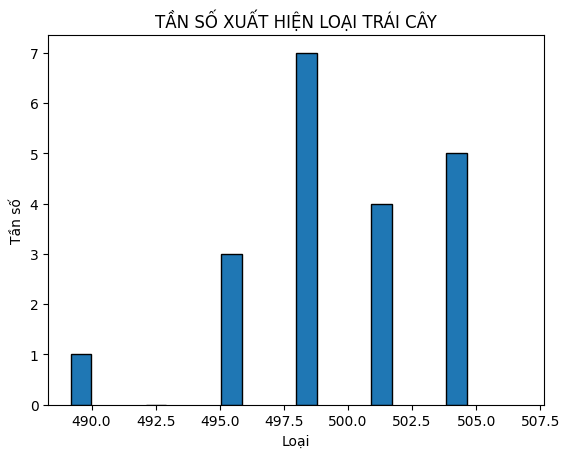

Giá trị trung bình: 500.6128809832195
Giá trị trung bình: 4.167077459743729


In [103]:
norm_data = norm.rvs(loc=mu, scale=sigma, size=20)

bins = int(np.ceil(np.log2(len(norm_data)) + 1))
plt.hist(norm_data, bins=bins, edgecolor="black", width=0.8)

plt.xlabel('Loại')
plt.ylabel('Tần số')
plt.title('TẦN SỐ XUẤT HIỆN LOẠI TRÁI CÂY')

plt.show()

print("Giá trị trung bình:", norm_data.mean())
print("Giá trị trung bình:", norm_data.std())

c. Bạn hãy mô phỏng lấy mẫu  100 trái cây trên. Bạn hãy vẽ histogram trọng lượng trái cây và tính giá trị trung bình và độ lệch chuẩn trái cây từ mẫu

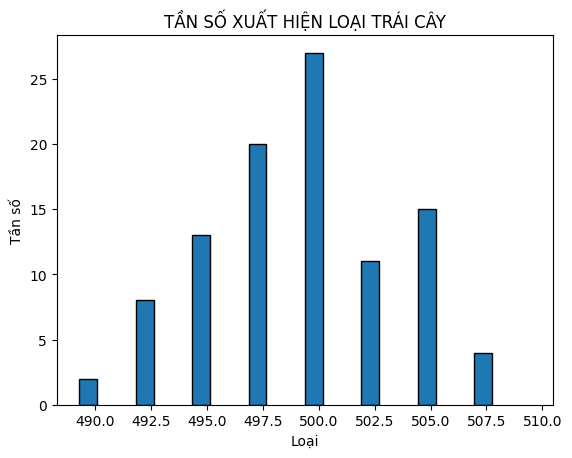

Giá trị trung bình: 500.0562953204094
Giá trị trung bình: 4.146257651170025


In [104]:
norm_data = norm.rvs(loc=mu, scale=sigma, size=100)

bins = int(np.ceil(np.log2(len(norm_data)) + 1))
plt.hist(norm_data, bins=bins, edgecolor="black", width=0.8)

plt.xlabel('Loại')
plt.ylabel('Tần số')
plt.title('TẦN SỐ XUẤT HIỆN LOẠI TRÁI CÂY')

plt.show()

print("Giá trị trung bình:", norm_data.mean())
print("Giá trị trung bình:", norm_data.std())

d. Từ hai cách lấy mẫu ở câu b, c bạn có nhận xét gì không?

Nhận xét: Với mẫu n=100, trung bình và độ lệch chuẩn mẫu gần với giá trị thực của dân số (500 gam và 4 gam) hơn so với mẫu n=20.

**Bài 05:** Tạo 5000 số ngẫu nhiên có phân phối nhị thức với n=50, p=0.7 Bạn Hãy

In [105]:
n, p = 500, 0.7

binom_data = binom.rvs(n=n, p=p, size=5000)

a. Tìm các giá trị thống kê: min, max, Q1, Q2, Q3


In [106]:
s = pd.Series(binom_data)

print("min:", s.min())
print("max:", s.max())
print("q1:", s.quantile(0.25))
print("q2:", s.quantile(0.5))
print("q3:", s.quantile(0.75))

min: 310
max: 385
q1: 343.0
q2: 350.0
q3: 357.0


b. Vẽ đồ thị boxplot

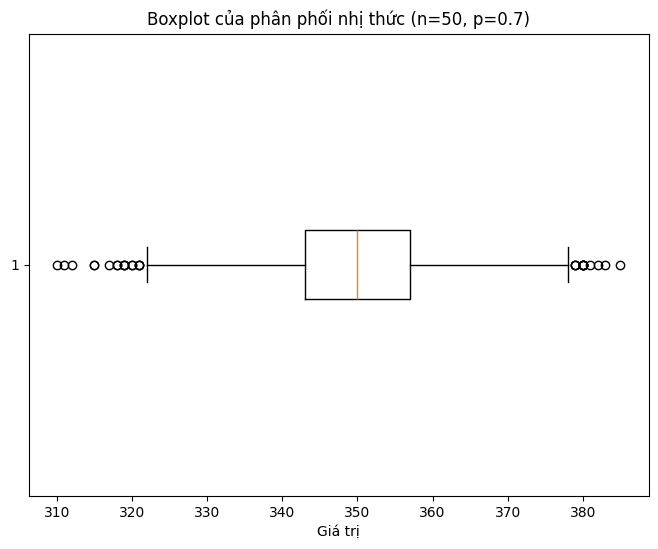

In [107]:
plt.figure(figsize=(8, 6))
plt.boxplot(s, vert=False)
plt.title("Boxplot của phân phối nhị thức (n=50, p=0.7)")
plt.xlabel("Giá trị")
plt.show()


c. Vẽ các đồ thị: tần số, tần suất

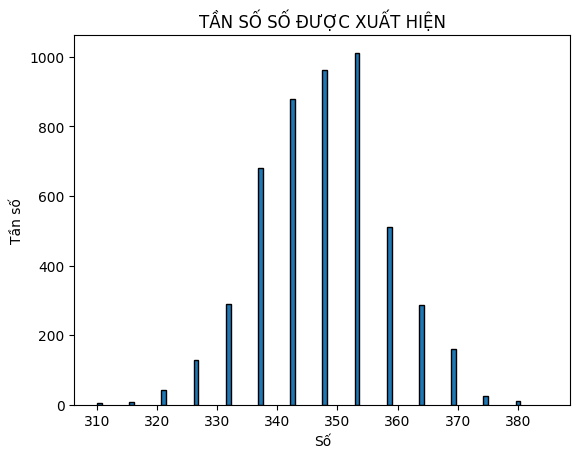

In [108]:
bins = int(np.ceil(np.log2(len(binom_data)) + 1))
plt.hist(binom_data, bins=bins, edgecolor="black", width=0.8)

plt.xlabel('Số')
plt.ylabel('Tần số')
plt.title('TẦN SỐ SỐ ĐƯỢC XUẤT HIỆN')

plt.show()

## Đề 3

### Bài 1
Một nhà sản xuất điện thoại kiểm tra chất lượng sản phẩm bằng cách chọn ngẫu nhiên 12 chiếc điện thoại từ mỗi lô sản xuất. Xác suất một chiếc điện thoại bị lỗi là 0.05.


In [109]:
n, p = 12, 0.05

Xác suất để có đúng 2 chiếc điện thoại bị lỗi trong một lần kiểm tra.

In [110]:
print("Xác suất để có đúng 2 chiếc điện thoại bị lỗi trong một lần kiểm tra:", binom.pmf(2, n, p) * 100)

Xác suất để có đúng 2 chiếc điện thoại bị lỗi trong một lần kiểm tra: 9.87915949743324


Xác suất để có ít nhất 1 chiếc điện thoại bị lỗi.

In [111]:
print("Xác suất để có ít nhất 1 chiếc điện thoại bị lỗi:", binom.sf(0, n, p) * 100)

Xác suất để có ít nhất 1 chiếc điện thoại bị lỗi: 45.9639912337363


Vẽ histogram thể hiện phân phối của số điện thoại bị lỗi trên 1000 lần kiểm tra.

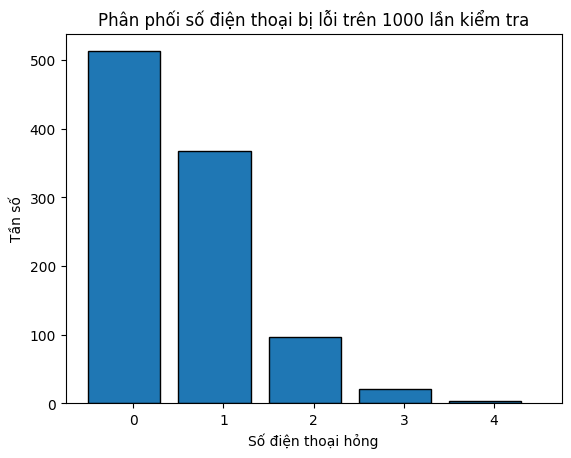

In [112]:
binom_data = binom.rvs(n, p, size=1000)

# bins = int(np.ceil(np.log2(len(binom_data)) + 1)) Liên tục
# Rời rạc
bins=np.arange(min(binom_data), max(binom_data) + 1.5) - 0.5 

plt.hist(binom_data, bins=bins, edgecolor="black", width=0.8)

plt.xlabel('Số điện thoại hỏng')
plt.ylabel('Tần số')
plt.title('Phân phối số điện thoại bị lỗi trên 1000 lần kiểm tra')

plt.show()

### Bài 2:
Một trạm xe buýt có trung bình 4 chuyến xe đến mỗi giờ.

In [113]:
lambda_trips = 4

Xác suất có đúng 6 chuyến xe đến trong một giờ.

In [114]:
print("Xác suất có đúng 6 chuyến xe đến trong một giờ:", poisson.pmf(lambda_trips, 6) * 100)

Xác suất có đúng 6 chuyến xe đến trong một giờ: 13.385261753998332


Vẽ biểu đồ histogram thể hiện phân phối số chuyến xe đến trên 1000 giờ quan sát.

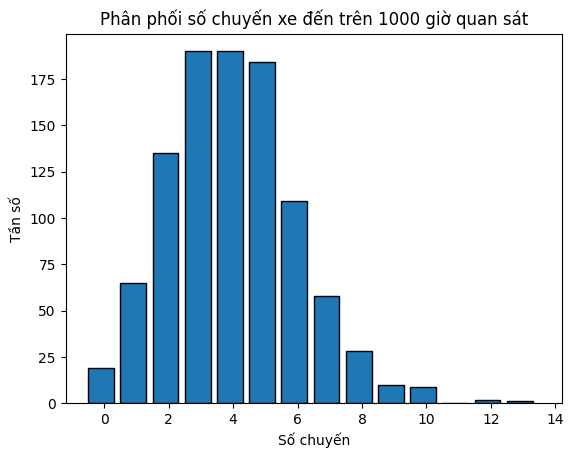

In [115]:
poisson_data = poisson.rvs(lambda_trips, size=1000)

# bins = int(np.ceil(np.log2(len(binom_data)) + 1)) Liên tục
# Rời rạc
bins=np.arange(min(poisson_data), max(poisson_data) + 1.5) - 0.5 

plt.hist(poisson_data, bins=bins, edgecolor="black", width=0.8)

plt.xlabel('Số chuyến')
plt.ylabel('Tần số')
plt.title('Phân phối số chuyến xe đến trên 1000 giờ quan sát')

plt.show()

Xác suất một sinh viên có chiều cao hơn 180 cm.

In [116]:
mu = 175
sigma = 6

# print("Xác suất một sinh viên có chiều cao hơn 180 cm:", (1 - norm.cdf(180, loc=mu, scale=sigma)) * 100)
print("Xác suất một sinh viên có chiều cao hơn 180 cm:", norm.sf(180, loc=mu, scale=sigma) * 100)

Xác suất một sinh viên có chiều cao hơn 180 cm: 20.232838096364308


Xác suất một sinh viên có chiều cao trong khoảng 170 cm đến 180 cm.

In [117]:
res = (norm.cdf(180, loc=mu, scale=sigma) - norm.cdf(170, loc=mu, scale=sigma)) * 100

print("Xác suất một sinh viên có chiều cao hơn 180 cm:", res)

Xác suất một sinh viên có chiều cao hơn 180 cm: 59.53432380727137


Vẽ biểu đồ histogram thể hiện phân phối chiều cao của 1000 sinh viên.

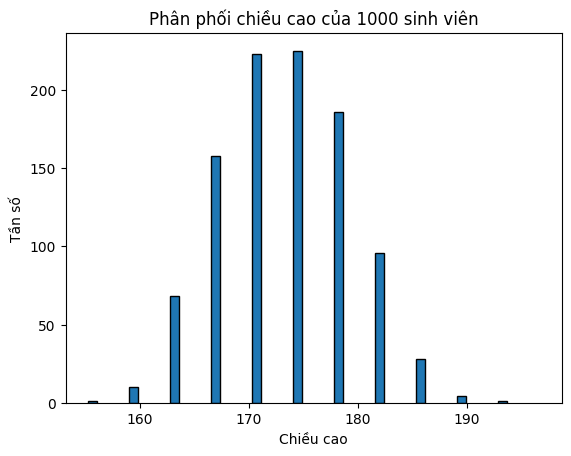

In [118]:
norm_data = norm.rvs(loc=mu, scale=sigma, size=1000)

bins = int(np.ceil(np.log2(len(norm_data)) + 1)) 
# Rời rạc bins=np.arange(min(poisson_data), max(poisson_data) + 1.5) - 0.5 

plt.hist(norm_data, bins=bins, edgecolor="black", width=0.8)

plt.xlabel('Chiều cao')
plt.ylabel('Tần số')
plt.title('Phân phối chiều cao của 1000 sinh viên')

plt.show()

### Bài 4: Đo lường hiệu suất máy kiểm tra lỗi
Một dây chuyền sản xuất có 5% sản phẩm lỗi. Một máy kiểm tra lỗi có độ chính xác như sau:

- Xác suất phát hiện đúng một sản phẩm lỗi: 0.9 (nếu thật sự là sản phẩm lỗi).
- Xác suất báo sai (phát hiện nhầm sản phẩm tốt là lỗi): 0.02.

Công nhân kiểm tra một lô gồm 20 sản phẩm:

In [119]:
n = 20
p_real = 0.05
p_true = 0.9
p_false = 0.02

Tính xác suất có đúng 3 sản phẩm lỗi thực sự trong lô.


In [120]:
print("Xác suất có đúng 3 sản phẩm lỗi thực sự trong lô", binom.pmf(3, n, p_real) * 100)

Xác suất có đúng 3 sản phẩm lỗi thực sự trong lô 5.958214776873279


Tính xác suất máy kiểm tra báo có ít nhất 2 sản phẩm lỗi.

In [121]:
mo_phong = binom.rvs(n, p_real, size=5000)

so_san_pham_loi = binom.rvs(mo_phong, p_true) + binom.rvs(n - mo_phong, p_false)
print("Tính xác suất máy kiểm tra báo có ít nhất 2 sản phẩm lỗi:", np.mean(so_san_pham_loi >= 2))

Tính xác suất máy kiểm tra báo có ít nhất 2 sản phẩm lỗi: 0.3686


Mô phỏng 5000 lô hàng và vẽ biểu đồ thể hiện số sản phẩm bị báo lỗi.


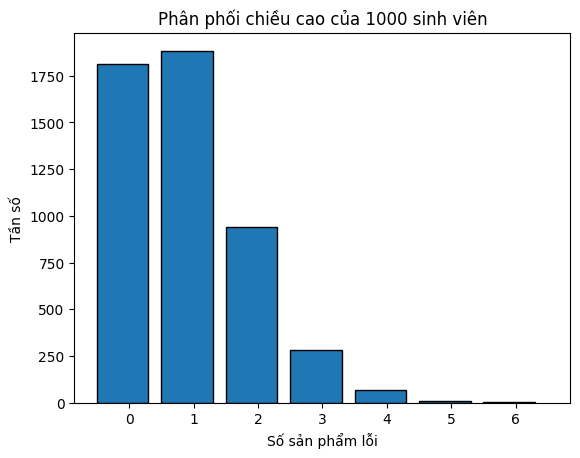

In [122]:
# bins = int(np.ceil(np.log2(len(norm_data)) + 1)) 
bins=np.arange(min(mo_phong), max(mo_phong) + 1.5) - 0.5 

plt.hist(mo_phong, bins=bins, edgecolor="black", width=0.8)

plt.xlabel('Số sản phẩm lỗi')
plt.ylabel('Tần số')
plt.title('Phân phối chiều cao của 1000 sinh viên')

plt.show()

### Bài 5: Phân tích dữ liệu khách hàng đến cửa hàng
Một quán cà phê có trung bình 8 khách đến mỗi giờ vào buổi sáng (8h-12h) và 12 khách mỗi giờ vào buổi chiều (12h-17h).

In [123]:
lambda_morning = 8
morning_hour = 4

lambda_afternoon = 12
afternoon_hour = 5

Tính xác suất có đúng 10 khách đến vào một giờ bất kỳ buổi sáng.

In [124]:
print("Xác suất có đúng 10 khách đến vào một giờ bất kỳ buổi sáng:", poisson.pmf(10, mu=lambda_morning) * 100)

Xác suất có đúng 10 khách đến vào một giờ bất kỳ buổi sáng: 9.926153383153544


Nếu cửa hàng mở từ 8h sáng đến 5h chiều, tính xác suất có hơn 100 khách trong một ngày.


In [125]:
lambda_whole_morning = 8 * 4
lambda_whole_afternoon = 12 * 5

lambda_whole_day = lambda_whole_morning + lambda_whole_afternoon

print("Xác suất có hơn 100 khách trong một ngày:", poisson.sf(100, mu=lambda_whole_day) * 100)

Xác suất có hơn 100 khách trong một ngày: 18.668484733129777


Mô phỏng 1000 ngày làm việc, vẽ biểu đồ số lượng khách mỗi ngày.

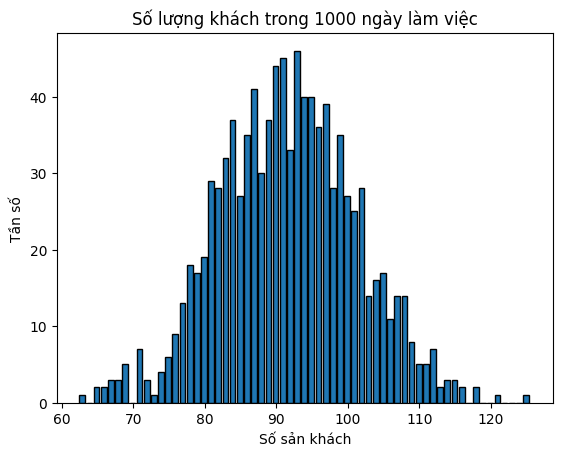

In [126]:
poisson_data = poisson.rvs(mu=lambda_whole_day, size=1000)

# bins = int(np.ceil(np.log2(len(norm_data)) + 1)) 
bins= np.arange(min(poisson_data), max(poisson_data) + 2) - 0.5  

plt.hist(poisson_data, bins=bins, edgecolor="black", width=0.8)

plt.xlabel('Số sản khách')
plt.ylabel('Tần số')
plt.title('Số lượng khách trong 1000 ngày làm việc')

plt.show()

### Bài 6: Phân tích điểm thi đại học
Một kỳ thi có điểm trung bình 70, độ lệch chuẩn 8.



In [127]:
mu = 70
sigma = 8

Tính xác suất một sinh viên đạt trên 85 điểm.


In [128]:
res = norm.sf(85, loc=mu, scale=sigma)

print("Xác suất một sinh viên đạt trên 85 điểm:", res * 100)

Xác suất một sinh viên đạt trên 85 điểm: 3.0396361765261375


Trong một lớp 40 sinh viên, tính xác suất có ít nhất 5 sinh viên đạt trên 85 điểm.


In [129]:
prob_5_above = binom.sf(4, 40, res)

print("Xác suất có ít nhất 5 sinh viên đạt trên 85 điểm:", prob_5_above * 100)

Xác suất có ít nhất 5 sinh viên đạt trên 85 điểm: 0.7040901406901482


Mô phỏng 5000 lớp học, vẽ histogram số sinh viên đạt trên 85 điểm trong mỗi lớp.


Text(0.5, 1.0, 'Số sinh viên đạt trên 85 điểm trong mỗi lớp')

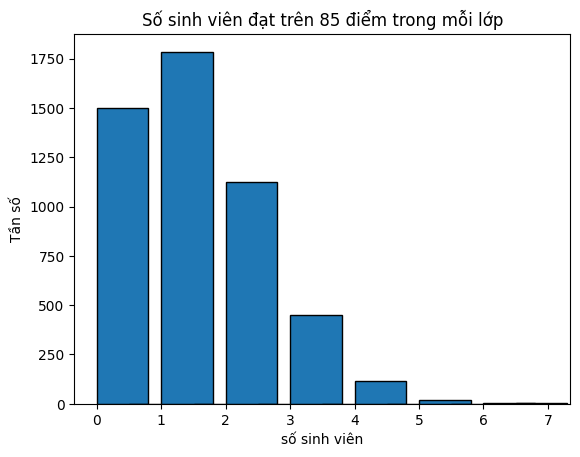

In [130]:
normal_data = binom.rvs(40, res,size=5000)

bins = int(np.ceil(np.log2(len(normal_data)) + 1)) 
# bins= np.arange(min(poisson_data), max(poisson_data) + 2) - 0.5  

plt.hist(normal_data, bins=bins, edgecolor="black", width=0.8)

plt.xlabel('số sinh viên')
plt.ylabel('Tần số')
plt.title('Số sinh viên đạt trên 85 điểm trong mỗi lớp')
